## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.parse

In [2]:
from bs4 import BeautifulSoup
import requests

## HTTP Requests

In [3]:
url = 'https://www.laptopsdirect.co.uk/'

## Get Requests

In [4]:
response = requests.get(url)

## Status Code

In [5]:
response.status_code

200

## Soup Object

In [6]:
soup = BeautifulSoup(response.content, 'html.parser')

<!DOCTYPE html>
<html lang="en-IN"><head><meta charset="utf-8"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>all shops list in allahabad - Google Search</title><script nonce="ZAKzeu+gGkc1bBD/zR5sfA==">(function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"==c||"q"==c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!=document.documentElement;a=a.parentElement)if("A"==a.tagName){a="1"==a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){
var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.googl
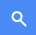

In [7]:
soup

## Results

In [11]:
results = soup.find_all('div', {'class':'OfferBox'})

In [12]:
len(results)

0

In [14]:
results[1]

IndexError: list index out of range

## Fetching Necessary data

### Product Name

In [11]:
results[0].find('a', {'class': 'offerboxtitle'}).get_text()

'Samsung Galaxy Tab Active 3 64GB LTE 8 Inch Tablet - Black - SM-T575NZKAEEA'

### Product Price

In [12]:
results[0].find('span', {'class': 'offerprice'}).get_text()

'£449.97'

### Product Reviews

In [13]:
results[0].find('star-rating').get('rating-value')

'9'

### Reviews Count

In [14]:
results[0].find('star-rating').get('ratings-count')

'2'

### Relative URL

In [15]:
# extract the relative url
relative_url = results[0].find('a', {'class': 'offerboxtitle'}).get('href')

In [16]:
relative_url

'/samsung-galaxy-tab-active-3-64gb-8-inch-tablet-black-sm-t575nzkaeea/version.asp'

In [17]:
# provide the root element inside a variable
root_url = 'https://www.laptopsdirect.co.uk'

In [18]:
# combine the both URLs which is root element and relative url
url_combine = root_url + relative_url

In [19]:
url_combine

'https://www.laptopsdirect.co.uk/samsung-galaxy-tab-active-3-64gb-8-inch-tablet-black-sm-t575nzkaeea/version.asp'

### Product Details

In [20]:
results[0].find('div', {'class': 'productInfo'}).get_text().strip().replace('\n', ', ')

'Exynos 9810 Processor, 8Inch Display, 64GB Storage, 4GB RAM, 2 year warranty'

### Everything Together With For Loop

In [21]:
product_name = []
product_price = []
review_rating = []
review_count = []
relative_url = []
product_details = []

for result in results:
    
    #name
    try:
        product_name.append(result.find('a', {'class': 'offerboxtitle'}).get_text())
    except:
        product_name.append('n/a')
        
    #price
    try:
        product_price.append(result.find('span', {'class': 'offerprice'}).get_text())
    except:
        product_price.append('n/a')
        
    #review rating
    try:
        review_rating.append(result.find('star-rating').get('rating-value'))
    except:
        review_rating.append('n/a')
        
    #review rating
    try:
        review_count.append(result.find('star-rating').get('ratings-count'))
    except:
        review_count.append('n/a')
        
    #relative url
    try:
        relative_url.append(result.find('a', {'class': 'offerboxtitle'}).get('href'))
    except:
        relative_url.append('n/a')
        
    #product details
    try:
        product_details.append(result.find('div', {'class': 'productInfo'}).get_text().strip().replace('\n', ', '))
    except:
        product_details.append.append('n/a')
        

### Combining URLs

In [22]:
url_combined = []

for link in relative_url:
    url_combined.append(urllib.parse.urljoin(root_url, link))

In [23]:
url_combined

['https://www.laptopsdirect.co.uk/samsung-galaxy-tab-active-3-64gb-8-inch-tablet-black-sm-t575nzkaeea/version.asp',
 'https://www.laptopsdirect.co.uk/samsung-galaxy-tab-a7-3gb-32gb-wi-fi-10.4-inch-tablet-grey-sm-t500nzaaeua/version.asp',
 'https://www.laptopsdirect.co.uk/refurbished-samsung-galaxy-tab-s6-lite-64gb-10.4-inch-4g-tablet-a1-sm-p615/version.asp',
 'https://www.laptopsdirect.co.uk/samsung-galaxy-tab-s6-lite-wi-fi-4gb-64gb-10.4-inch-android-tablet-sm-p610nzaabtu/version.asp',
 'https://www.laptopsdirect.co.uk/samsung-galaxy-tab-active-pro-4g-4gb-64gb-10.1-inch-android-tablet-sm-t545nzkau07/version.asp',
 'https://www.laptopsdirect.co.uk/-sm-t395nzkabtu/version.asp',
 'https://www.laptopsdirect.co.uk/-sm-t290nzkabtu/version.asp',
 'https://www.laptopsdirect.co.uk/samsung-galaxy-tab-s6-lite-lte-4gb-64gb-10.4-inch-android-tablet-sm-p615nzaabtu/version.asp',
 'https://www.laptopsdirect.co.uk/samsung-galaxy-tab-a7-3gb-32gb-ssd-wi-fi-10.4-inch-tablet-silver-sm-t500nzsaeua/version.a

### Create Pandas Dataframe

In [24]:
product_overview = pd.DataFrame({'Product Name': product_name, 'Product Price': product_price, 'Rating': review_rating,
                                'Review Count': review_count, 'Link': url_combined, 'Details': product_details})

In [25]:
product_overview

,Product Name,Product Price,Rating,Review Count,Link,Details
0,Samsung Galaxy Tab Active 3 64GB LTE 8 Inch Ta...,£449.97,9,2,https://www.laptopsdirect.co.uk/samsung-galaxy...,"Exynos 9810 Processor, 8Inch Display, 64GB Sto..."
1,Samsung Galaxy Tab A7 32GB 10.4 Inch Tablet - ...,£189.97,8.9,1368,https://www.laptopsdirect.co.uk/samsung-galaxy...,"10.4Inch Display, 32GB Storage, 3GB RAM, 1 yea..."
2,Refurbished Samsung Galaxy Tab S6 Lite 64GB Ce...,£239.97,n/a,n/a,https://www.laptopsdirect.co.uk/refurbished-sa...,"10.4Inch Display, 64GB Storage, 4GB RAM, 3 Mon..."
3,Samsung Galaxy Tab S6 Lite 64GB 10.4 Inch Andr...,£329.97,9,2,https://www.laptopsdirect.co.uk/samsung-galaxy...,"10.4Inch Display, 64GB Storage, 4GB RAM, 2 yea..."
4,Samsung Galaxy Tab Active Pro 4G 64GB 10.1 Inc...,£569.97,9.3,3,https://www.laptopsdirect.co.uk/samsung-galaxy...,"10.1Inch Display, 64GB Storage, 4GB RAM, 2 yea..."
5,Samsung Galaxy Tab Active2 T395 8 Inch Rugged ...,£423.97,7.9,10,https://www.laptopsdirect.co.uk/-sm-t395nzkabt...,"8Inch Display, 16GB Storage, 3GB RAM, 2 year w..."
6,Samsung Galaxy Tab A T290 8 Inch Tablet - Bla...,£134.36,8.7,954,https://www.laptopsdirect.co.uk/-sm-t290nzkabt...,"8Inch Display, 32GB Storage, 2GB RAM, 1 year w..."
7,Samsung Galaxy Tab S6 Lite LTE 64GB 10.4 Inch ...,£386.36,9,8153,https://www.laptopsdirect.co.uk/samsung-galaxy...,"10.4Inch Display, 64GB Storage, 4GB RAM, 2 yea..."
8,Samsung Galaxy Tab A7 32GB SSD 10.4 Inch Tabl...,£224.97,8.9,656,https://www.laptopsdirect.co.uk/samsung-galaxy...,"10.4Inch Display, 32GB Storage, 3GB RAM, 1 yea..."
9,Samsung Galaxy Tab A7 32GB SSD LTE 10.4 Inch T...,£219.97,8.8,71,https://www.laptopsdirect.co.uk/samsung-galaxy...,"10.4Inch Display, 32GB Storage, 3GB RAM, 1 yea..."


### Export output In Excel Format

In [26]:
product_overview.to_excel('results_single_page.xlsx', index=False)

## Pagination

In [27]:
product_name = []
product_price = []
review_rating = []
review_count = []
relative_url = []
product_details = []

for i in range(1, 21):
    
    #url
    url = 'https://www.laptopsdirect.co.uk/bct/tablet-pcs-and-e-readers/tablet-pcs/samsung?pageNumber=1' + str(i)
    
    #request
    response = requests.get(url)
    
    #soup object
    soup = BeautifulSoup(response.content, 'html.parser')
    
    #results
    results = soup.find_all('div', {'class':'OfferBox'})
    
    #loop through results
    for result in results:
        
        #name
        try:
            product_name.append(result.find('a', {'class': 'offerboxtitle'}).get_text())
        except:
            product_name.append('n/a')
        
        #price
        try:
            product_price.append(result.find('span', {'class': 'offerprice'}).get_text())
        except:
            product_price.append('n/a')
        
        #review rating
        try:
            review_rating.append(result.find('star-rating').get('rating-value'))
        except:
            review_rating.append('n/a')
        
        #review rating
        try:
            review_count.append(result.find('star-rating').get('ratings-count'))
        except:
            review_count.append('n/a')
        
        #relative url
        try:
            relative_url.append(result.find('a', {'class': 'offerboxtitle'}).get('href'))
        except:
            relative_url.append('n/a')
        
        #product details
        try:
            product_details.append(result.find('div', {'class': 'productInfo'}).get_text().strip().replace('\n', ', '))
        except:
            product_details.append.append('n/a')
        

C:\Anaconda\envs\pandas\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\envs\pandas\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'COUNT PLOT')

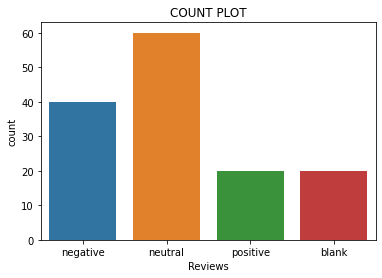

In [37]:
import seaborn as sns
sns.countplot(review_rating) 
sns.countplot(review_count)
plt.xlabel('Reviews')
plt.xticks([0,1,2,3],['negative','neutral','positive', 'blank'])
plt.title('COUNT PLOT')

In [28]:
url_combined = []

for link in relative_url:
    url_combined.append(urllib.parse.urljoin(root_url, link))

In [29]:
product_overview = pd.DataFrame({'Product Name': product_name, 'Product Price': product_price, 'Rating': review_rating,
                                'Review Count': review_count, 'Link': url_combined, 'Details': product_details})

In [30]:
product_overview

,Product Name,Product Price,Rating,Review Count,Link,Details
0,Samsung Galaxy Tab S6 128GB 4G 10.5 Inch Table...,£569.97,n/a,n/a,https://www.laptopsdirect.co.uk/samsung-galaxy...,"10.5Inch Display, 128GB Storage, 6GB RAM, 2 ye..."
1,Samsung Galaxy Tab A7 32GB SSD LTE 10.4 Inch T...,£219.97,9.1,62,https://www.laptopsdirect.co.uk/samsung-galaxy...,"10.4 Inch Display, 32GB Storage, 3GB RAM, 1 ye..."
2,Samsung Galaxy Tab 7 32GB SSD LTE 10.4 Inch Ta...,£219.97,9.1,52,https://www.laptopsdirect.co.uk/samsung-galaxy...,"10.4 Display, 32GB Storage, 3 RAM, 1 year warr..."
3,Samsung Galaxy Tab S6 Lite 64GB Andriod 10.4 I...,£404.97,n/a,n/a,https://www.laptopsdirect.co.uk/samsung-galaxy...,"10.4in Display, 4GB RAM, 2-year warranty"
4,Samsung Galaxy Tab A7 32GB SSD 10.4 Inch Tabl...,£224.97,9.1,684,https://www.laptopsdirect.co.uk/samsung-galaxy...,"10.4Inch Display, 32GB Storage, 3GB RAM, 1 yea..."
...,...,...,...,...,...,...
95,Samsung Galaxy Tab S6 128GB 4G 10.5 Inch Table...,£569.97,n/a,n/a,https://www.laptopsdirect.co.uk/samsung-galaxy...,"10.5Inch Display, 128GB Storage, 6GB RAM, 2 ye..."
96,Samsung Galaxy Tab A7 32GB SSD LTE 10.4 Inch T...,£219.97,9.1,62,https://www.laptopsdirect.co.uk/samsung-galaxy...,"10.4 Inch Display, 32GB Storage, 3GB RAM, 1 ye..."
97,Samsung Galaxy Tab 7 32GB SSD LTE 10.4 Inch Ta...,£219.97,9.1,52,https://www.laptopsdirect.co.uk/samsung-galaxy...,"10.4 Display, 32GB Storage, 3 RAM, 1 year warr..."
98,Samsung Galaxy Tab S6 Lite 64GB Andriod 10.4 I...,£404.97,n/a,n/a,https://www.laptopsdirect.co.uk/samsung-galaxy...,"10.4in Display, 4GB RAM, 2-year warranty"


In [31]:
product_overview.to_excel('results_multiple_page.xlsx', index=False)